In [71]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [72]:
dataset = pd.read_table("../drugsCom_raw/drugsComTrain_raw.tsv")
dataset_test = pd.read_table("../drugsCom_raw/drugsComTest_raw.tsv")

In [73]:
print(f'shape of train is {dataset.shape}')
print(f'shape of test is {dataset_test.shape}')

shape of train is (161297, 7)
shape of test is (53766, 7)


In [74]:
#combine the dataset because we need to do data pre processing for both of them 
dataset_combined = pd.concat([dataset,dataset_test])

In [75]:
#rename columns
dataset_combined.columns = ['Id','drugName','condition','review','rating','date','usefulCount']

In [76]:
print(f'shape of dataset is {dataset_combined.shape}')

shape of dataset is (215063, 7)


## Data Preprocessing - Condition

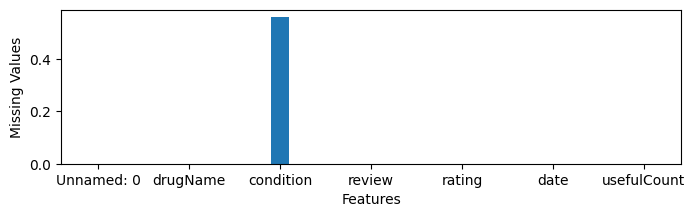

In [77]:
##1. Check Nan values
x = []
y= []
fig = plt.figure(figsize = ( 8, 2))

for col in dataset.columns:
    x.append(col)
    y.append(dataset[col].isna().sum() * 100 / dataset[col].count())

plt.bar(x,y,width=0.2)
plt.xlabel("Features")
plt.ylabel("Missing Values")

plt.show()

In [78]:
## Remove NAN rows

dataset_combined = dataset_combined.dropna(axis=0)

In [79]:
dataset_combined.isnull().sum()

Id             0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [80]:
print(f'shape of dataset is {dataset_combined.shape}')

shape of dataset is (213869, 7)


In [81]:
##2. check unique rows 
dataset_combined.nunique()
## Unnamed: O column is like an ID for every row since there are 161297 
## unique ID which means there are no duplicates in the dataset

Id             213869
drugName         3667
condition         916
review         128449
rating             10
date             3579
usefulCount       397
dtype: int64

<AxesSubplot:>

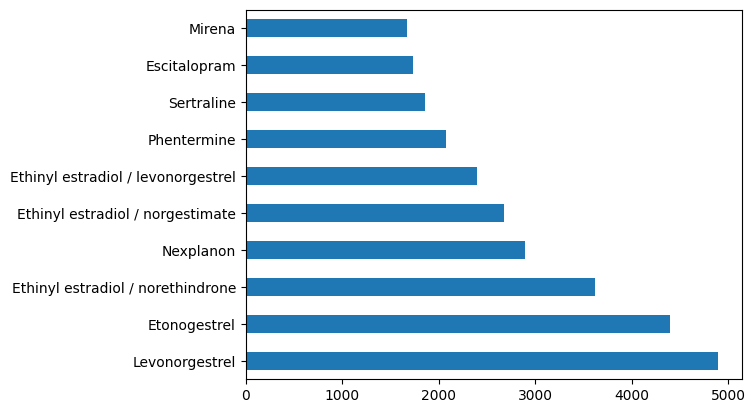

In [82]:
## DATA insights

# Top 10 most common drug Names
dataset_combined["drugName"].value_counts().nlargest(n=10).plot.barh()

## Labeling for condition

In [83]:
dataset_combined[dataset_combined['condition'] == "0</span> users found this comment helpful."]
dataset_combined["condition"]= dataset_combined["condition"].str.replace('\d<\/span> users found this comment helpful.','Not Listed',regex=True)


Text(0.5, 1.0, 'Top 20 most common conditions')

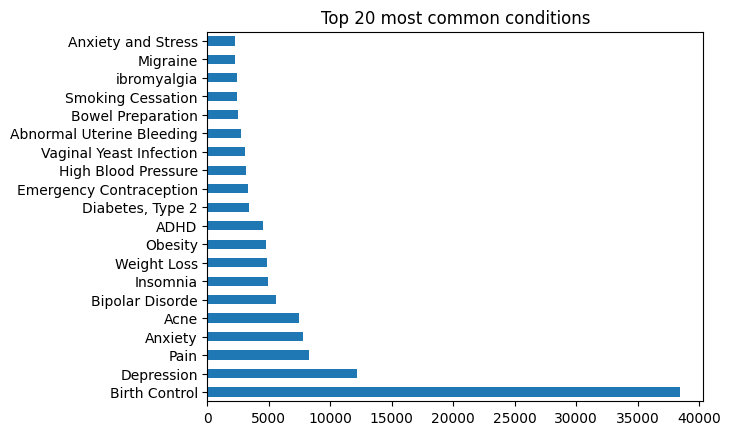

In [84]:
# Top 10 most common conditions
dataset_combined["condition"].value_counts().nlargest(n=20).plot.barh()
plt.title("Top 20 most common conditions")

In [85]:
from sklearn.preprocessing import LabelEncoder
lk = LabelEncoder()
dataset_label = dataset_combined[["condition"]].apply(lk.fit_transform)
dataset_label.columns = ['condition_label']
dataset_combined = pd.concat([dataset_combined,dataset_label],axis=1)

In [86]:
dataset_combined.head(3)

,Id,drugName,condition,review,rating,date,usefulCount,condition_label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27,414
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...",8.0,"April 27, 2010",192,14
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...",5.0,"December 14, 2009",17,109


## UsefulCount

In [87]:
dataset_combined["usefulCount"].describe()

count    213869.000000
mean         28.094118
std          36.401377
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

Text(0.5, 1.0, 'Distribution of usefulCount')

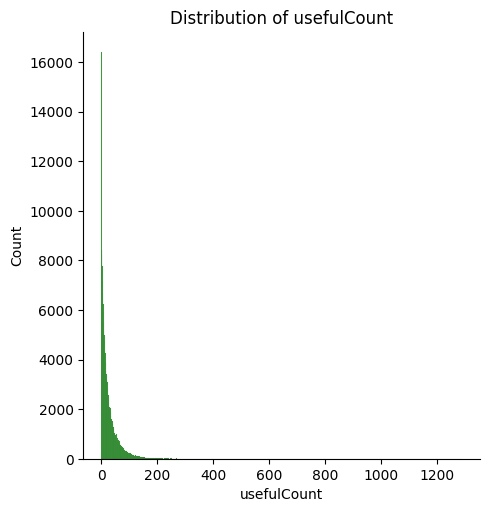

In [88]:
import seaborn as sns
sns.displot(dataset_combined["usefulCount"],color='green')
plt.title("Distribution of usefulCount")

In [89]:
dataset_combined["usefulCount_minmax"] = (dataset_combined["usefulCount"] - dataset_combined["usefulCount"].min()) / (dataset_combined["usefulCount"].max() - dataset_combined["usefulCount"].min())

In [90]:
dataset_combined["usefulCount_minmax"].describe()

count    213869.000000
mean          0.021762
std           0.028196
min           0.000000
25%           0.004648
50%           0.012393
75%           0.027885
max           1.000000
Name: usefulCount_minmax, dtype: float64

In [91]:
dataset_combined.head(1)

,Id,drugName,condition,review,rating,date,usefulCount,condition_label,usefulCount_minmax
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27,414,0.020914


## Ratings

In [92]:
dataset["rating"].values

array([ 9.,  8.,  5., ...,  2., 10.,  9.])

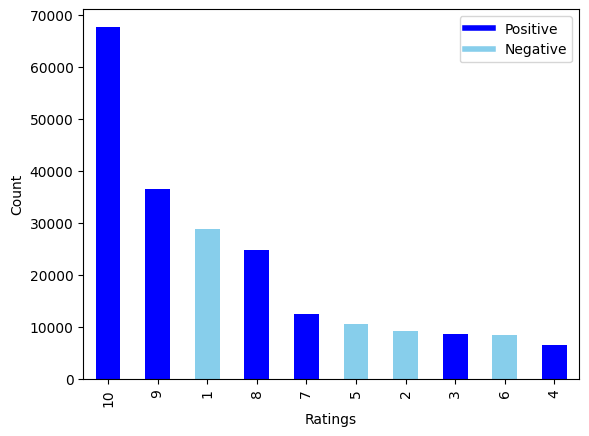

In [109]:
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
custom_lines = [Line2D([0],[0],color="blue",lw=4),
                Line2D([0],[0],color="skyblue",lw=4)]
colors = ["blue" if i > 5 else "skyblue" for i in dataset_combined["rating"].values]

ax = dataset_combined["rating"].astype('int').value_counts().plot.bar(color=colors,legend=True)
ax.set_ylabel("Count")
ax.set_xlabel("Ratings")
ax.legend(custom_lines,["Positive","Negative"])
plt.show()


In [107]:
classify = lambda x: "Positive" if x > 5 else "Negative"
dataset_combined["outcome"] = dataset_combined["rating"].map(classify)

[Text(0, 0, '149963'), Text(0, 0, '63906')]

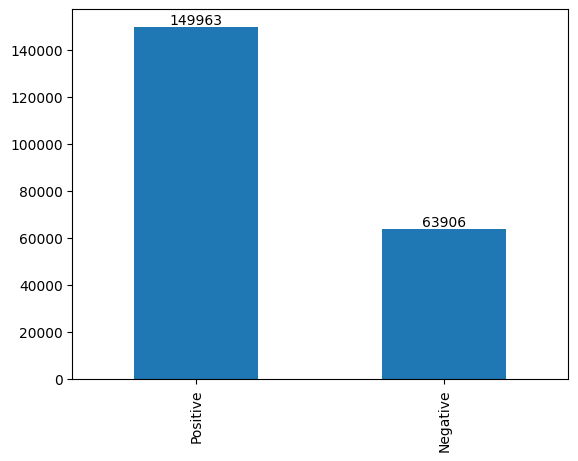

In [108]:
ax = dataset_combined["outcome"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [96]:
# df = dataset.groupby("drugName")["drugName"].count().reset_index(name='counts')

## Review

In [97]:
dataset_combined["review"]

0                                                                                                                                "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"
1        "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...
2        "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...
3        "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...
4        "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account

In [98]:
#change the reviews to lower case
dataset_combined["review"] = dataset_combined["review"].str.lower()

In [99]:
pd.options.display.max_colwidth = 200
#remove all punctuation
dataset_combined["review"]= dataset_combined['review'].str.replace('[^\w\s]','',regex=True)

In [100]:
dataset_combined["review"] = dataset_combined['review'].str.replace('039',' ',regex=True)

In [101]:
from wordcloud import WordCloud,STOPWORDS

In [102]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          stopwords=STOPWORDS,
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()

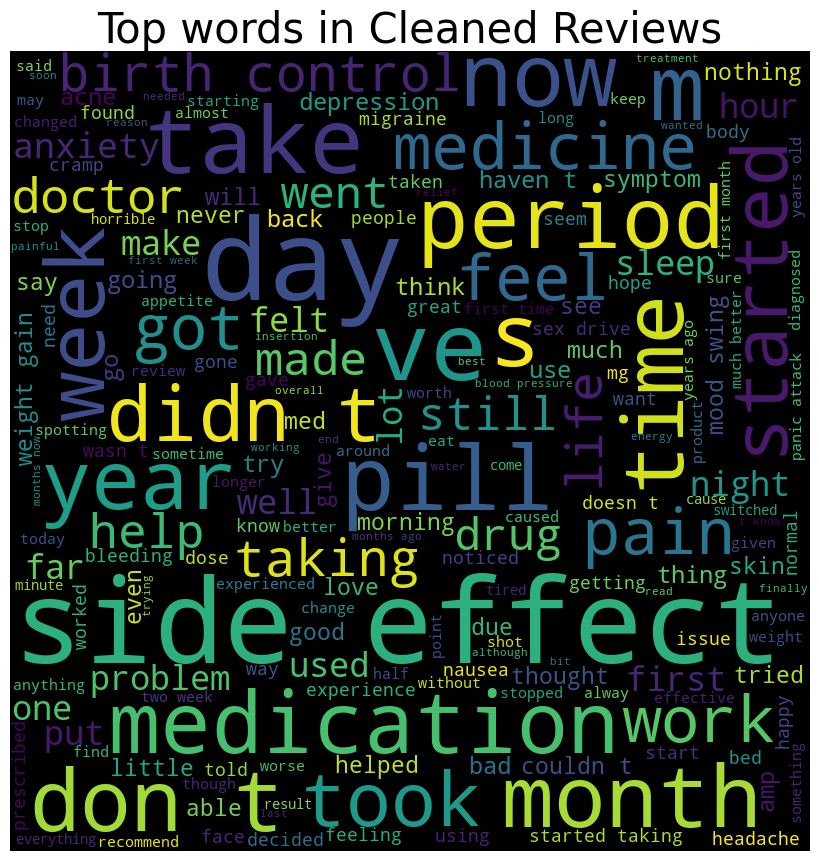

In [104]:
wordCloud_generator(dataset_combined["review"],title="Top words in Cleaned Reviews")

In [111]:
dataset_combined.to_csv("../drugsCom_raw/cleaned_data.csv",index=False)